<a href="https://colab.research.google.com/github/shivanshkapadiya/ML/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd

# Get stock data for a company (e.g., Apple) for the last 1 year
ticker = yf.Ticker("AAPL")
df = ticker.history(period="1y")

# Display the data
print(df.head())


                                 Open        High         Low       Close  \
Date                                                                        
2024-07-05 00:00:00-04:00  220.618222  225.395881  220.618222  225.286392   
2024-07-08 00:00:00-04:00  226.032909  226.789381  222.210787  226.759521   
2024-07-09 00:00:00-04:00  226.868985  228.332143  225.316249  227.615494   
2024-07-10 00:00:00-04:00  228.232630  231.995033  228.182860  231.895493   
2024-07-11 00:00:00-04:00  230.312891  231.308236  224.719057  226.510681   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-07-05 00:00:00-04:00  60412400        0.0           0.0  
2024-07-08 00:00:00-04:00  59085900        0.0           0.0  
2024-07-09 00:00:00-04:00  48076100        0.0           0.0  
2024-07-10 00:00:00-04:00  62627700        0.0           0.0  
2024-07-11 00:00:00-04:00  64710600        0.0           0.0  


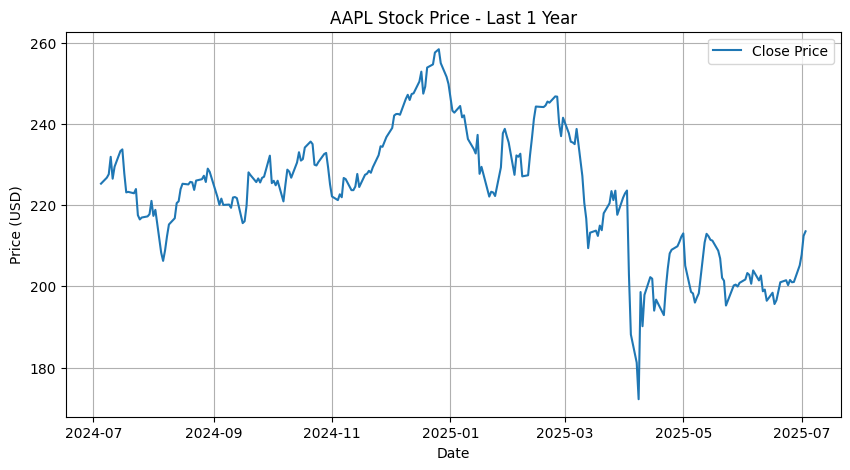

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


                        Date        Open        High         Low       Close  \
19 2024-08-01 00:00:00-04:00  223.325570  223.435059  216.009793  217.343552   
20 2024-08-02 00:00:00-04:00  218.129877  224.549865  216.696592  218.836578   
21 2024-08-05 00:00:00-04:00  198.163233  212.506158  195.087620  208.295853   
22 2024-08-06 00:00:00-04:00  204.344342  209.012512  200.134036  206.265350   
23 2024-08-07 00:00:00-04:00  205.936887  212.645518  205.429266  208.843307   

       Volume  Dividends  Stock Splits Stock        MA_5  ...      EMA_10  \
19   62501000        0.0           0.0  AAPL  218.068164  ...  219.968891   
20  105568600        0.0           0.0  AAPL  218.446396  ...  219.763016   
21  119548600        0.0           0.0  AAPL  216.660745  ...  217.678078   
22   69660500        0.0           0.0  AAPL  214.357513  ...  215.603036   
23   63516400        0.0           0.0  AAPL  211.916928  ...  214.373995   

    Daily_Return  Volatility_10  Price_Range     RSI_14 

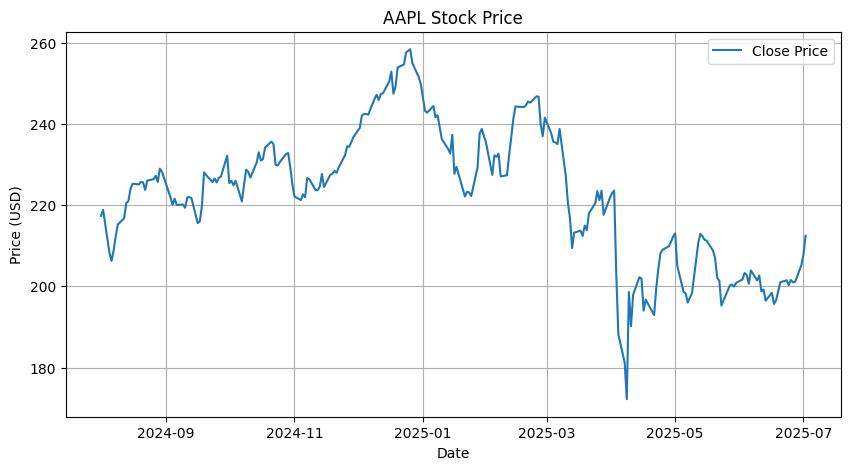

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load Data
# ----------------------------
ticker = "AAPL"
data = yf.Ticker(ticker)
df = data.history(period="1y")
df.reset_index(inplace=True)
df['Stock'] = ticker

# ----------------------------
# 2. Technical Indicators
# ----------------------------

# Moving Averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Exponential Moving Average
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Daily Return
df['Daily_Return'] = df['Close'].pct_change()

# Volatility
df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()

# Price Range
df['Price_Range'] = df['High'] - df['Low']

# RSI Function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_rsi(df['Close'])

# ----------------------------
# 3. Time-Based Features
# ----------------------------
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

# ----------------------------
# 4. Lag Features
# ----------------------------
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

# ----------------------------
# 5. Target Variable
# ----------------------------
df['Target'] = df['Close'].shift(-1)

# Drop rows with NaN (due to indicators and shift)
df.dropna(inplace=True)

# ----------------------------
# 6. Display the Final DataFrame
# ----------------------------
print(df.head())

# Optional: Plot Close Price
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.legend()
plt.show()


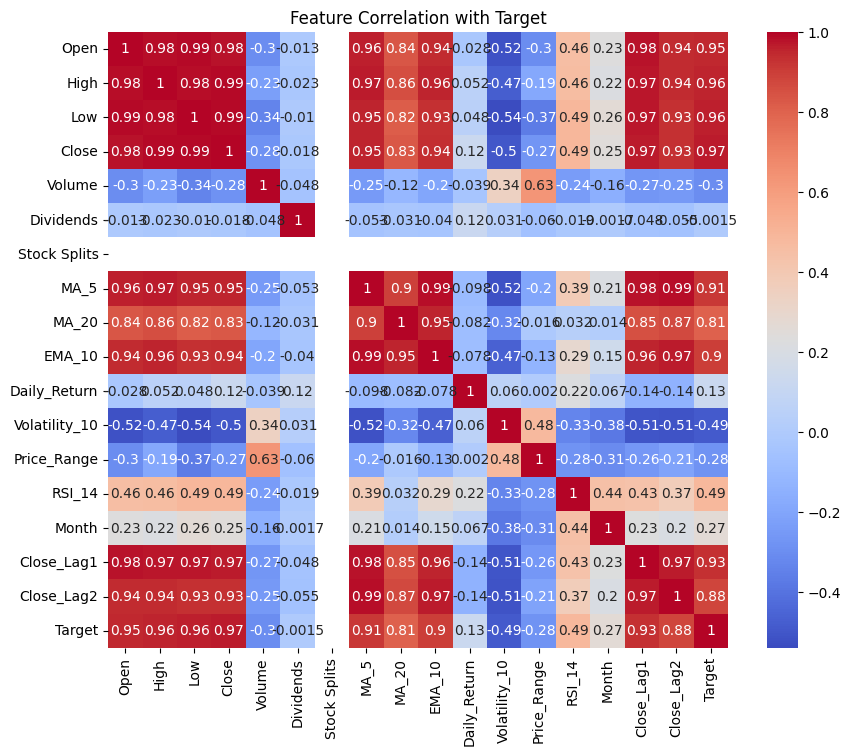

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = df.corr(numeric_only=True)

# Plot heatmap.....(motu che<<)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()


In [9]:
df['Trend'] = df['Target'] > df['Close']
df['Trend'] = df['Trend'].map({True: 'Bullish', False: 'Bearish'})
print(df[['Date', 'Close', 'Target', 'Trend']].tail())


                         Date       Close      Target    Trend
244 2025-06-26 00:00:00-04:00  201.000000  201.080002  Bullish
245 2025-06-27 00:00:00-04:00  201.080002  205.169998  Bullish
246 2025-06-30 00:00:00-04:00  205.169998  207.820007  Bullish
247 2025-07-01 00:00:00-04:00  207.820007  212.440002  Bullish
248 2025-07-02 00:00:00-04:00  212.440002  213.550003  Bullish


In [11]:
df.to_csv("enhanced_stock_data.csv", index=False)


In [12]:
df['Rolling_Max_10'] = df['Close'].rolling(window=10).max()
df['Rolling_Min_10'] = df['Close'].rolling(window=10).min()


In [13]:
weekly_stats = df.groupby('DayOfWeek').agg({
    'Close': 'mean',
    'Volatility_10': 'mean'
}).sort_values(by='Close', ascending=False)

print(weekly_stats)


                Close  Volatility_10
DayOfWeek                           
Friday     223.085782       0.016445
Tuesday    222.707704       0.016702
Thursday   222.551783       0.017645
Monday     222.250739       0.017238
Wednesday  221.678923       0.017825


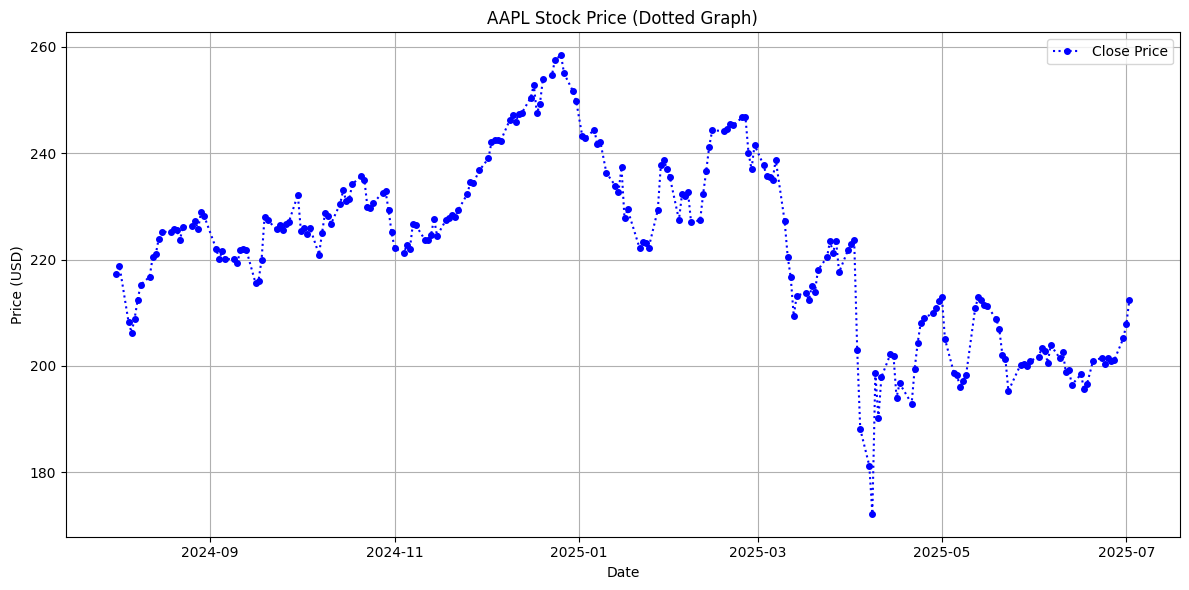

In [14]:
import matplotlib.pyplot as plt

# Plot Close price as dotted line
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], linestyle=':', marker='o', markersize=4, color='blue', label='Close Price')

plt.title(f"{ticker} Stock Price (Dotted Graph)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
